<a href="https://colab.research.google.com/github/SuryanshYagnik/Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing  multivariate regression to estimate the pricing of house using the availability facility information as features.

**A peek into the dataset :**

 The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.


 Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables.

In [ ]:
!pip install scikit-learn==1.0.2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
from sklearn.datasets import load_boston
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Load the dataset by calling the load_boston function
boston = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [ ]:
# Find the keys of all features in the dataset
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# Find the type of the data
data = boston.data
# Fill
type(data)

numpy.ndarray

In [ ]:
# Find the shape of the data
data_shape = boston.data.shape
print("Shape of the data:", data_shape)

Shape of the data: (506, 13)


In [ ]:
# Load the data into a pandas dataframe
data_df=pd.DataFrame(data=data,columns=boston.feature_names)
# Print the head of the dataframe to see how it is
# Fill
print(data_df.head)

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       1

In [ ]:
# sklearn datasets have the y value as boston.target. Load the y values as a new column data_df['PRICE']
# Fill
# Create a DataFrame for the data
data_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target variable 'PRICE' as a new column in the DataFrame
data_df['PRICE'] = boston.target

# Print the first few rows of the DataFrame to verify the 'PRICE' column addition
print(data_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
# Visualise the data frame using the .describe() function
# Fill
data_summary = data_df.describe()
print(data_summary)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
# Visualise the data frame using the .info() function
# Fill
data_info = data_df.info()
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [ ]:
# Create the train test split using sklearn function
# Fill
# Add the target variable 'PRICE' as a new column in the DataFrame
data_df['PRICE'] = boston.target

# Split the data into features (X) and target (y)
X = data_df.drop(columns=['PRICE'])  # Features
y = data_df['PRICE']  # Target variable

# Use train_test_split to create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [ ]:
# Load the Linear Regression model
# Fill
model = LinearRegression()
print(model)

LinearRegression()


In [ ]:
# Fit the loaded model using the train dataset
# Fill
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [ ]:
# Predict the y values corresponding to test x values
# Fill
y_pred = model.predict(X_test)
print(y_pred)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [ ]:
from sklearn.metrics import mean_squared_error
# Find the mse error using the sklearn function between the test y values and predicted y values corresponding to test x values
# Fill
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 24.291119474973485


# Second Part : Implementing Logistic Regression

Here you will have to implement a model to predict if a person will buy a product or not given their age.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

In [ ]:
# Load the dataset using load_csv function and visualize
data = pd.read_csv("data.csv")
print(data.head())
print(data.describe())
print(data.info())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Nul

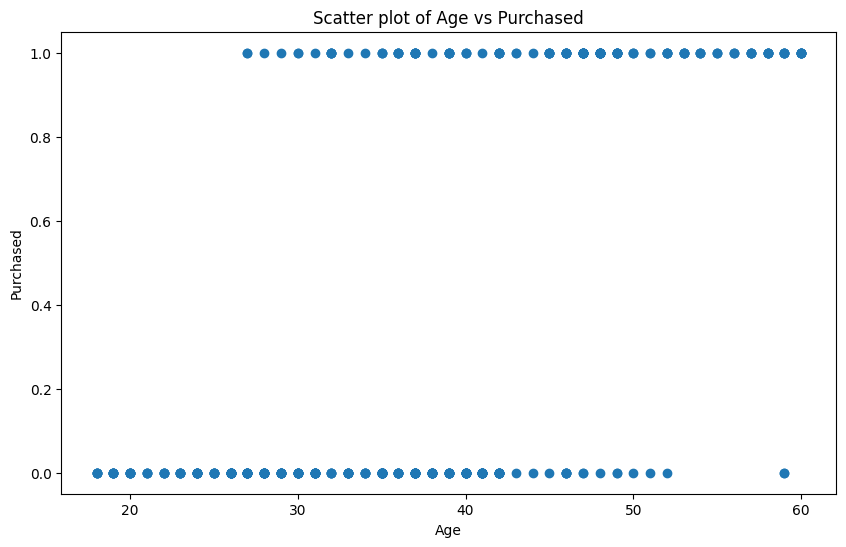

In [ ]:
# Try plotting a scatter plot of the data
plt.scatter(data['Age'], data['Purchased'])
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Scatter plot of Age vs Purchased')
plt.show()

In [ ]:
# Create the train test split
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import the logistic regression model from sklearn and initialize it
logistic_model = LogisticRegression()

In [ ]:
# Fit the model using the training samples
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict the y values for test_x values
y_pred = logistic_model.predict(X_test)

In [ ]:
# Calculate the accuracy of the model using sklearn function
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65
